In [1]:
import pandas as pd #LOGISTIC
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
%matplotlib inline

In [2]:
dataset = pd.read_csv('/content/sample_data/train.csv')
dataset = dataset.dropna(axis=0)

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
dataset['question_text'] = label_encoder.fit_transform(dataset['question_text'])

In [3]:
x = dataset.iloc[:,1].values.reshape(-1,1)
y = dataset['target'].values.reshape(-1,1)

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size = 0.3, random_state =42 )

from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression()
regressor.fit(x_train,y_train)

from sklearn.metrics import accuracy_score
y_pred = regressor.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
print('Accuracy:',accuracy)

Accuracy: 0.9365558912386707


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


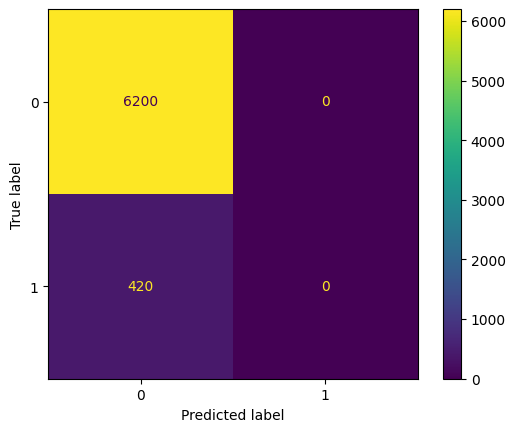

In [6]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

cm = confusion_matrix(y_test,y_pred)

disp = ConfusionMatrixDisplay(cm)
disp.plot()